# EDA (Exploratory Data Analysis) Animals-10 dataset

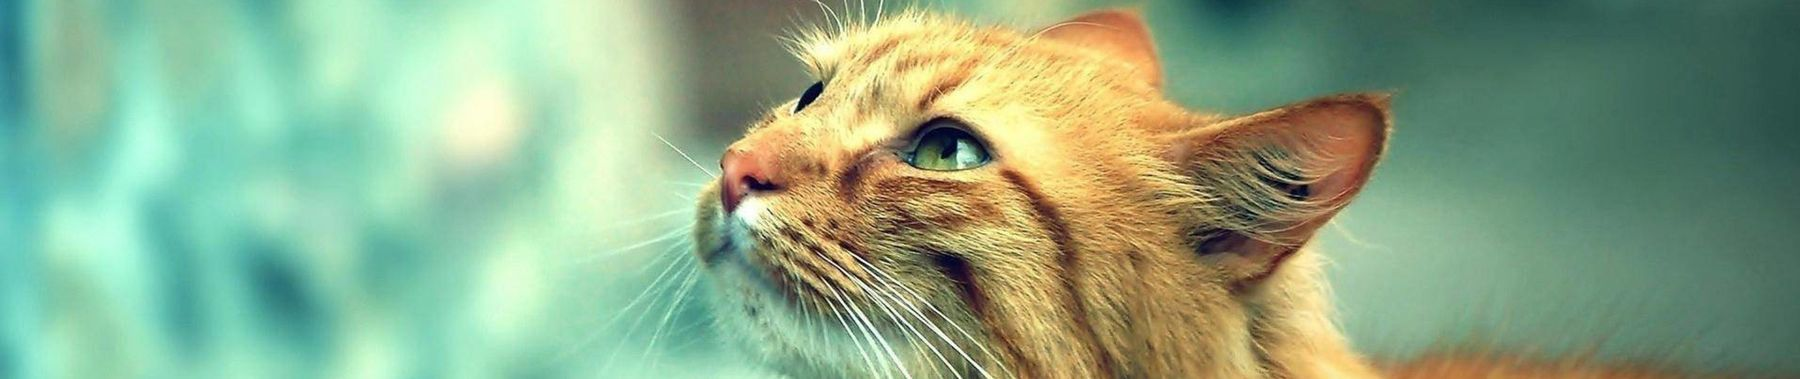

This dataset contains about 28K medium quality animal images belonging to 10 categories: dog, cat, horse, spyder, butterfly, chicken, sheep, cow, squirrel, elephant.

All the images have been collected from "google images" and have been checked by human. There is some erroneous data to simulate real conditions (eg. images taken by users of your app).

The main directory is divided into folders, one for each category. Image count for each category varies from 2K to 5 K units.



## Importing libraries

In [1]:
from pathlib import Path
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import kagglehub

## Importing dataset

In [3]:
path = kagglehub.dataset_download("alessiocorrado99/animals10")
data_path = Path(f"{path}/raw-img")
data_path

WindowsPath('C:/Users/Alex/.cache/kagglehub/datasets/alessiocorrado99/animals10/versions/2/raw-img')

We're looking for all jpeg files in our dataset

In [4]:
filepaths = list(data_path.glob(r"**/*jpeg"))  # Discover all directories recursively

Then, we get the folder path for each image,

x - image path, os.path.split(x) -> (folder, file), os.path.split(x)[0] -> folder, os.path.split(...) -> (parent_folder, folder_name), we choose folder_name, that's our label

In [5]:
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

Creating Series to combine them into DataFrame

In [6]:
filepaths = pd.Series(filepaths, name="Filepath").astype(str)
labels = pd.Series(labels, name="Label")

In [7]:
dataset = pd.concat([filepaths, labels], axis=1)

In [15]:
dataset.head()

,Filepath,Label
0,C:\Users\Alex\.cache\kagglehub\datasets\alessi...,dog
1,C:\Users\Alex\.cache\kagglehub\datasets\alessi...,dog
2,C:\Users\Alex\.cache\kagglehub\datasets\alessi...,dog
3,C:\Users\Alex\.cache\kagglehub\datasets\alessi...,dog
4,C:\Users\Alex\.cache\kagglehub\datasets\alessi...,dog


## Translating the labels from Italian to English

In [9]:
translate = {
    "cane": "dog",
    "cavallo": "horse",
    "elefante": "elephant",
    "farfalla": "butterfly",
    "gallina": "chicken",
    "gatto": "cat",
    "mucca": "cow",
    "pecora": "sheep",
    "scoiattolo": "squirrel",
    "ragno": "spider",
}

In [10]:
dataset["Label"] = dataset["Label"].map(translate)

## labels counts for the dataset

In [16]:
label_counts = dataset["Label"].value_counts()

In [17]:
label_counts

Label
dog          4863
spider       4497
chicken      3098
horse        2623
cow          1866
squirrel     1862
butterfly    1650
sheep        1444
cat          1227
elephant     1079
Name: count, dtype: int64

### Creating a bar plot for the labels and their counts

<Axes: xlabel='Label', ylabel='count'>

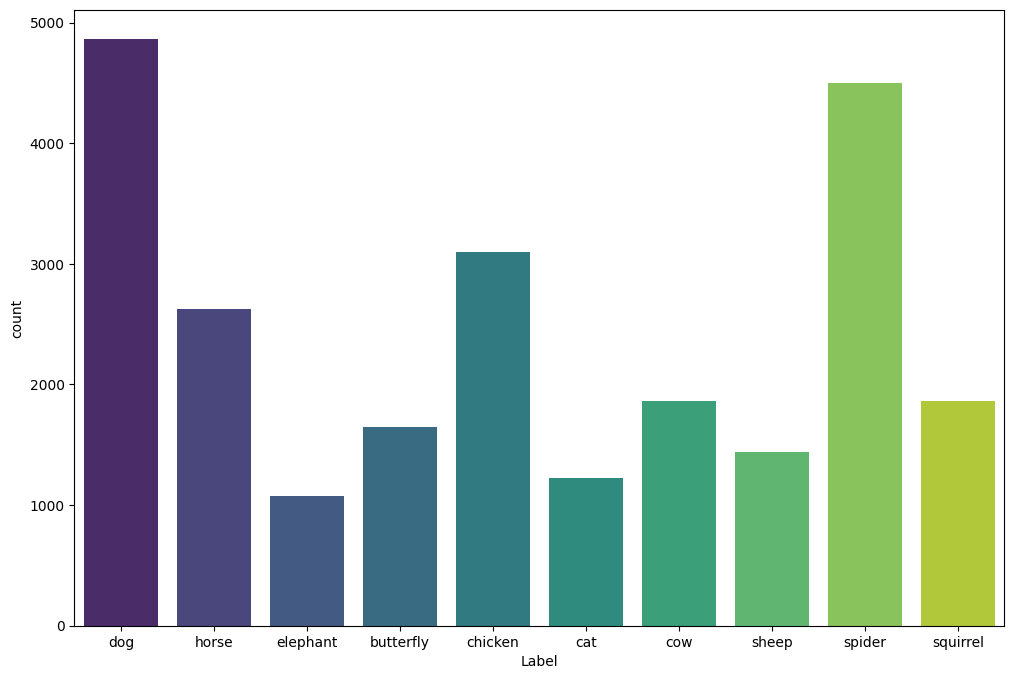

In [12]:
plt.figure(figsize=(12, 8))
sns.countplot(data=dataset, x="Label", hue="Label", palette="viridis")

## Visualizing 20 images from the dataset

In [13]:
indexes = np.random.randint(0, len(dataset), 20)

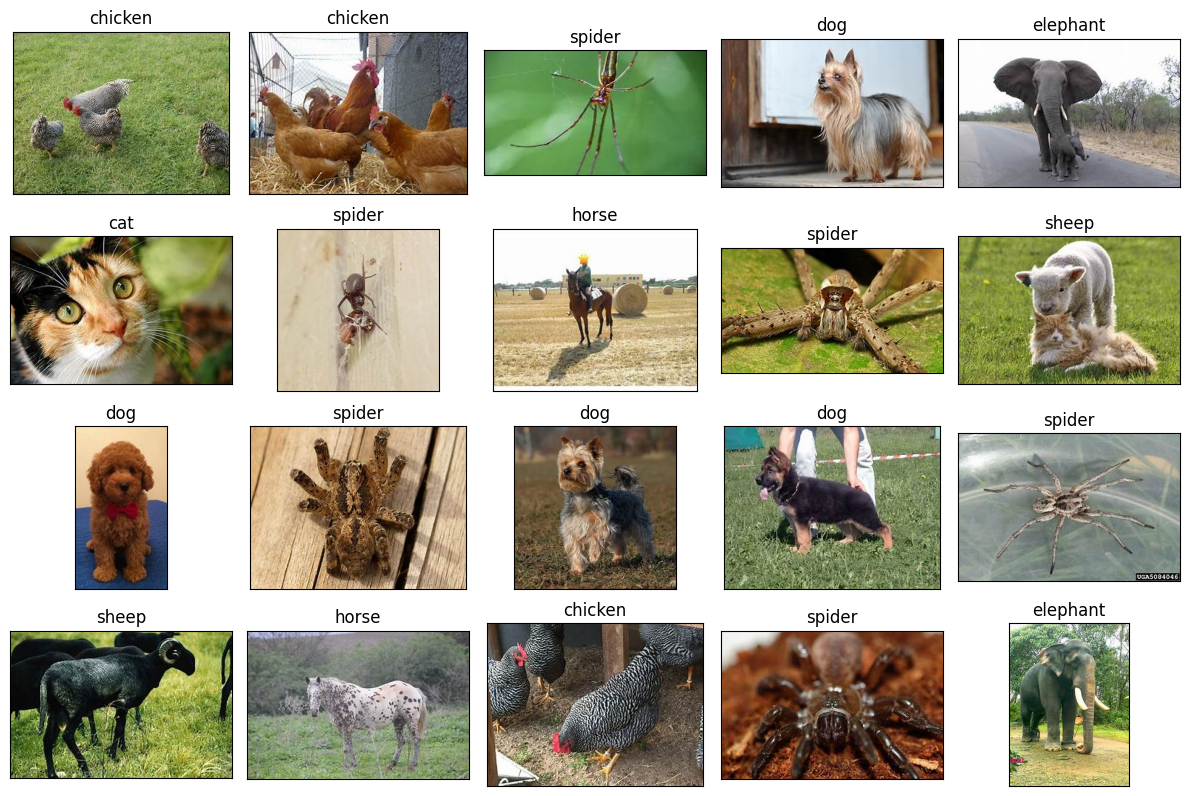

In [14]:
fig, axes = plt.subplots(4, 5, figsize=(12, 8), subplot_kw={"xticks": [], "yticks": []})
for i, ax in enumerate(axes.flat):
    image = plt.imread(dataset.Filepath[indexes[i]])
    ax.imshow(image)
    ax.set_title(dataset.Label[indexes[i]])
plt.tight_layout()
plt.show()